<a href="https://colab.research.google.com/github/jeromeslash83/Data-Science/blob/main/Shopee_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os #for working with folders.
import pandas as pd #for loading and working with the data itself.
import matplotlib.pyplot as plt #for graphing and visualizations, but mostly used for adjusting the visualizations.
import numpy as np #for advanced mathematical and statistical analysis.
import seaborn as sns #for Visualizations.
import warnings #to catch warnings that are way too long and not display them.

pd.set_option('display.max_rows', 150) #so I can display a max of 150 rows if I want to. Not necessarily needed.
pd.set_option('display.max_columns', None) #to display all the columns in the dataset.
print('Initialization Successful')

Initialization Successful


In [4]:
#This code will get the excel files in my Google Drive and save the excel file objects in a list.
folder_path_completed = '/content/drive/MyDrive/Data/Shopee/Dataset/Completed Orders 06-2020-09-2023'
excel_file = [file for file in os.listdir(folder_path_completed) if file.endswith('.xlsx')]
#This code will loop through the 'excel_file' list and convert the excel files into a dataframe and put it into another list named 'dataframes_completed.

# I also added a code to catch the warnings given because it's way too long.
dataframes_completed = []
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_file:
      file_path = os.path.join(folder_path_completed, file)
      df = pd.read_excel(file_path)
      dataframes_completed.append(df)

In [5]:
# Now since all the DataFrames have been added in the 'dataframes_completed' list, this code will concatenate all the DataFrames into one.
df_order = pd.concat(dataframes_completed, ignore_index=True)

In [7]:
col_to_remove = ['Order Status', 'Return / Refund Status','Shipping Option', 'Shipment Method',
       'Estimated Ship Out Date', 'Ship Time','Parent SKU Reference No.', 'SKU Reference No.', 'Variation Name', 'Original Price', 'Deal Price',
       'Total Discount(PHP)',
       'Price Discount(from Seller)(PHP)', 'Shopee Rebate(PHP)',
       'SKU Total Weight', 'Number of Items in Order', 'Order Total Weight',
       'Seller Voucher(PHP)', 'Seller Absorbed Coin Cashback',
       'Shopee Voucher(PHP)', 'Bundle Deals Indicator(Y/N)',
       'Shopee Bundle Discount(PHP)', 'Seller Bundle Discount(PHP)',
       'Shopee Coins Offset(PHP)', 'Credit Card Discount Total(PHP)', 'Buyer Paid Shipping Fee',
       'Shipping Rebate Estimate', 'Reverse Shipping Fee', 'Service Fee',
       'Grand Total', 'Estimated Shipping Fee','Remark from buyer',
       'Order Complete Time', 'Note', 'Username (Buyer)',	'Receiver Name',	'Phone Number',	'Delivery Address']

df_order.drop(columns=col_to_remove, inplace=True)

In [43]:
df_order['Order Creation Date'] = pd.to_datetime(df_order['Order Creation Date'])
df_order.head(5)

,Order ID,Tracking Number*,Order Creation Date,Order Paid Time,Product Name,Quantity,Product Subtotal,Products' Price Paid by Buyer (PHP),Town,District,Province,Region,Country,Zip Code,Returned quantity,City
0,200620A7RESEFK,780406537692,2020-06-20 19:32:00,2020-06-20 19:32,Bayabas (Mild Antiseptic Bath Soap),15,525,1006,Salapan,San Juan City,Metro Manila,Metro Manila,PH,1500,NaN,NaN
1,200620A7RESEFK,780406537692,2020-06-20 19:32:00,2020-06-20 19:32,Acapulco (Antifungal Bath Soap),20,700,1006,Salapan,San Juan City,Metro Manila,Metro Manila,PH,1500,NaN,NaN
2,200620AA5CP9P7,780406650623,2020-06-20 20:15:00,2020-06-20 20:15,Acapulco (Antifungal Bath Soap),40,1400,1198,Poblacion,Norzagaray,Bulacan,North Luzon,PH,3013,NaN,NaN
3,200620AD286HD3,780408841064,2020-06-20 21:07:00,2020-06-20 21:07,Bayabas (Mild Antiseptic Bath Soap),40,1400,1199,Poblacion,Norzagaray,Bulacan,North Luzon,PH,3013,NaN,NaN
4,200623HX8Y1A6F,780419893117,2020-06-23 21:03:00,2020-06-25 14:02,Citronella Antibacterial Bath Soap,100,3500,3500,San Jose (Pob.),Morong,Rizal,South Luzon,PH,1960,NaN,NaN


In [21]:
df_grouped_year = df_order.groupby(df_order['Order Creation Date'].dt.year)[['Quantity', 'Product Subtotal']].sum().reset_index()
df_grouped_year.head(5)

,Order Creation Date,Quantity,Product Subtotal
0,2020,2347,99187
1,2021,4743,208120
2,2022,4288,220811
3,2023,4025,227573


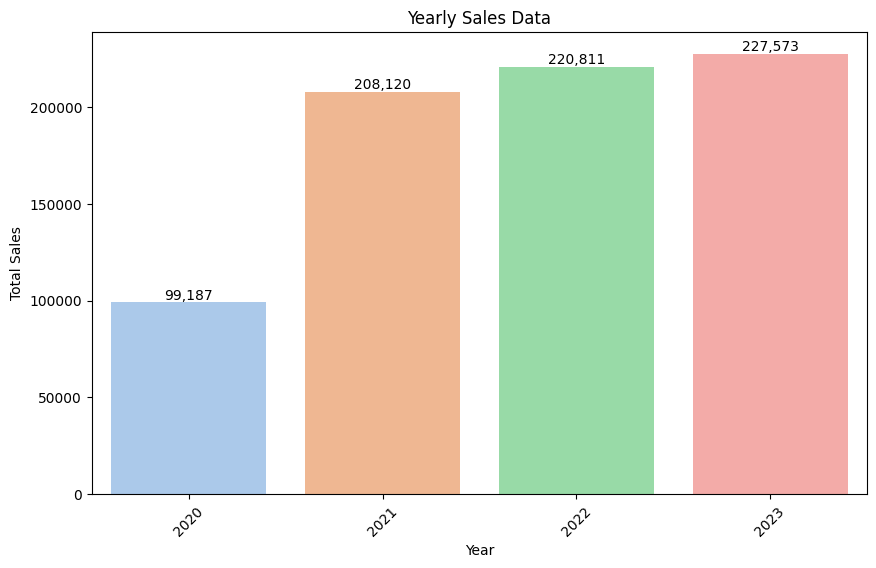

In [42]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a barplot
bp = sns.barplot(x='Order Creation Date', y='Product Subtotal', data=df_grouped_year, palette='pastel')

# Adding labels for each bar
for i in bp.patches:
    # Get the height of the bar (which represents the data value)
    height = i.get_height()
    # Put a text label with the value above each bar
    plt.text(i.get_x() + i.get_width() / 2.0, height, f'{height:,.0f}', ha='center', va='bottom')

plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Total Sales')  # Set y-axis label
plt.title('Yearly Sales Data')  # Set title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

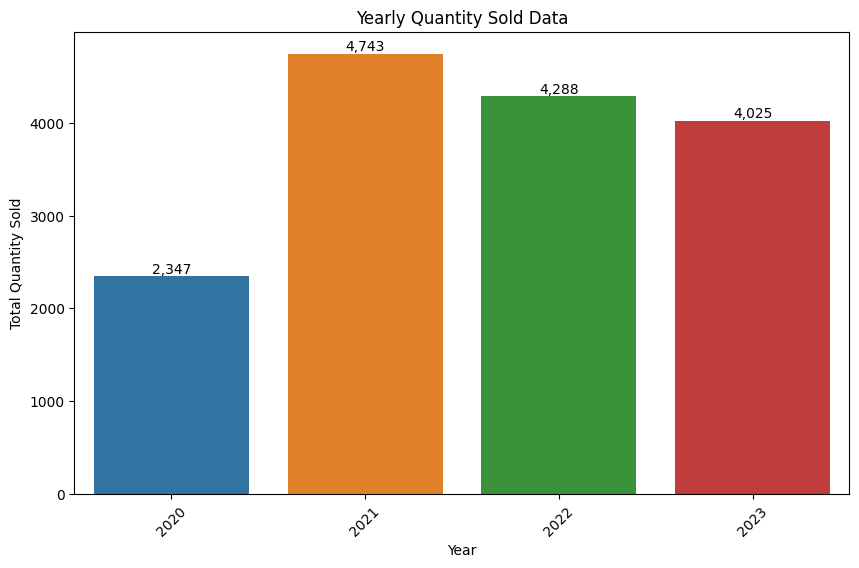

In [41]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a barplot
bp = sns.barplot(x='Order Creation Date', y='Quantity', data=df_grouped_year)

# Adding labels for each bar
for i in bp.patches:
    # Get the height of the bar (which represents the data value)
    height = i.get_height()
    # Put a text label with the value above each bar
    plt.text(i.get_x() + i.get_width() / 2.0, height, f'{height:,.0f}', ha='center', va='bottom')

plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Total Quantity Sold')  # Set y-axis label
plt.title('Yearly Quantity Sold Data')  # Set title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

In [44]:
df_monthly = df_order.groupby([df_order['Order Creation Date'].dt.year.rename('Year'),
                               df_order['Order Creation Date'].dt.month.rename('Month')])\
                     [['Quantity', 'Product Subtotal']].sum().reset_index()
df_monthly.head(5)

,Year,Month,Quantity,Product Subtotal
0,2020,6,318,11220
1,2020,7,357,17180
2,2020,8,734,26035
3,2020,9,345,14934
4,2020,10,153,7278


In [34]:
import calendar

df_monthly_21 = df_monthly[df_monthly['Year'] != 2020]

pivot_df = df_monthly_21.pivot_table(index='Month', columns='Year', values='Product Subtotal', fill_value=0)

pivot_df.index = pivot_df.index.map(lambda x: calendar.month_name[x])


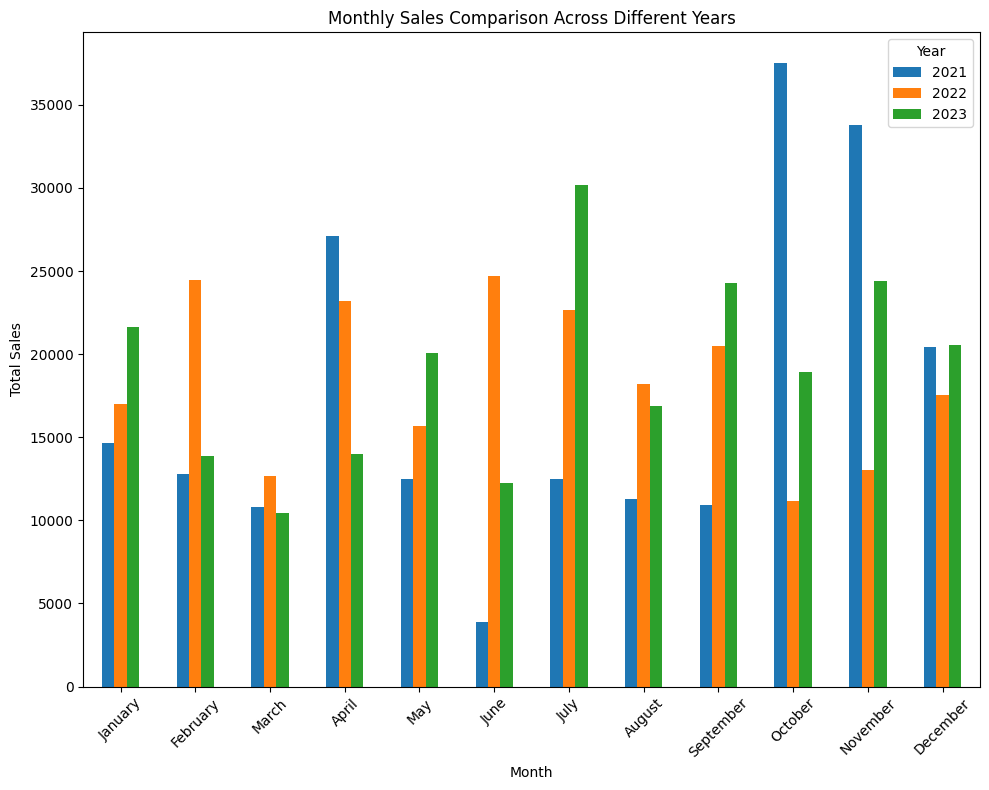

In [35]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Plotting
pivot_df.plot(kind='bar', ax=plt.gca())

plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Total Sales')  # Set the y-axis label
plt.title('Monthly Sales Comparison Across Different Years')  # Set the title

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Year')  # Add a legend
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot